21BAI1892

#**MV AS-1 (c)**

# Task 1: Introduction to histogram equalization

**Load and display an image:**

In [ ]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
#loading image and converting to grayscale
img = cv2.imread('pkmn.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(-0.5, 467.5, 702.5, -0.5)

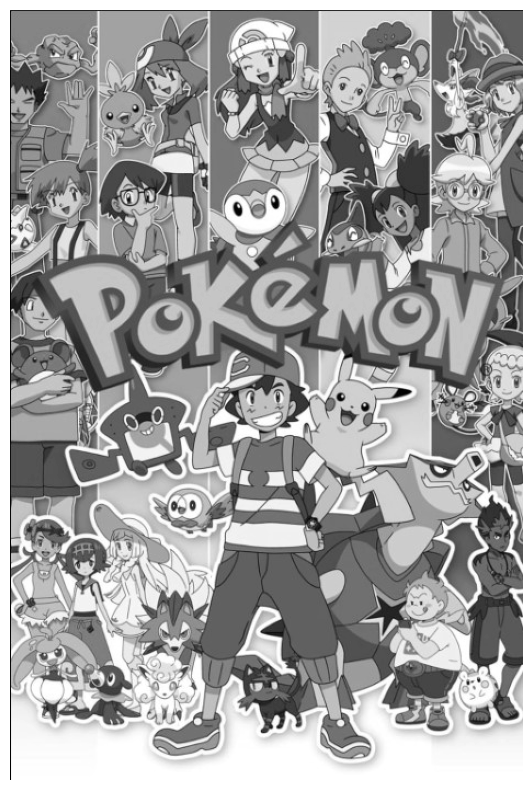

In [ ]:
#displaying original image
plt.figure(figsize=(15,10))
plt.imshow(gray, cmap='gray')
plt.axis('off')

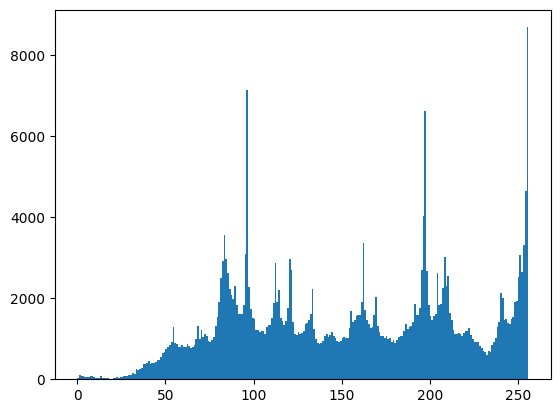

In [ ]:
#plotting histogram of original image with existing function
plt.hist(gray.ravel(), 256, [0,256])
plt.show()

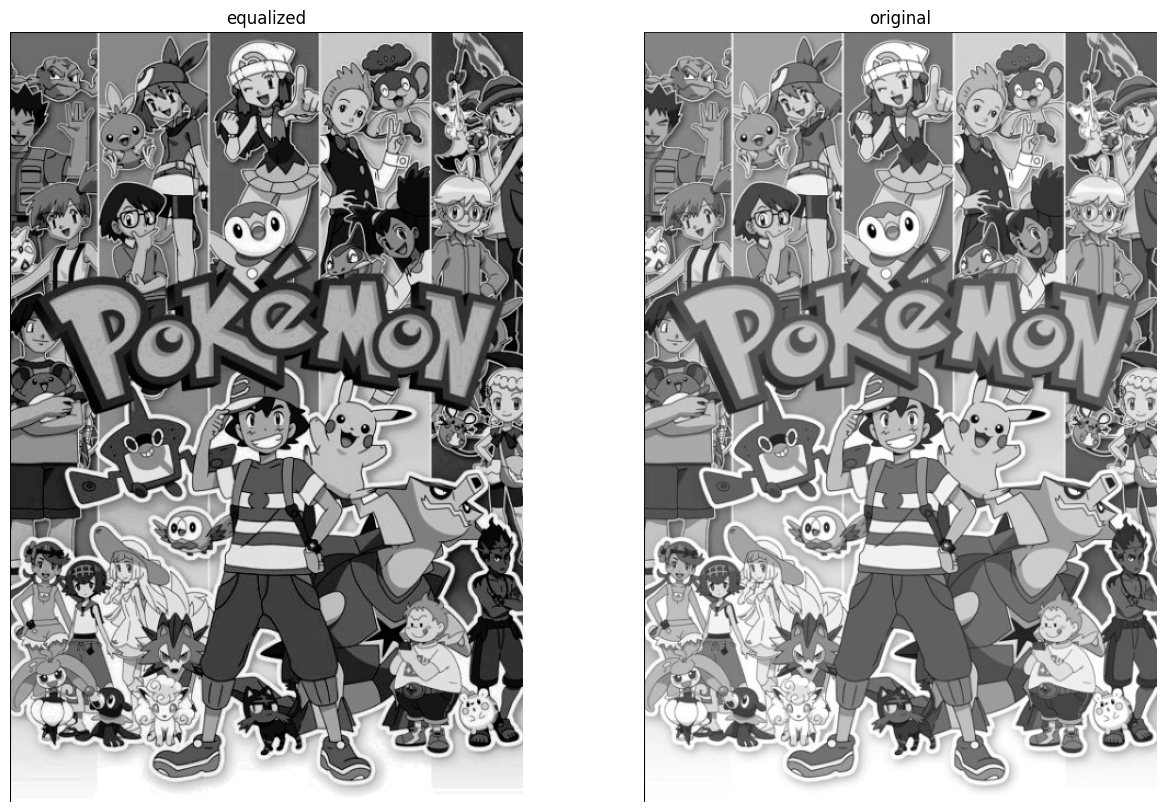

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("equalized")
plt.subplots_adjust(wspace=0.2)
plt.imshow(cv2.equalizeHist(gray), cmap = 'gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("original")
plt.imshow(gray, cmap = 'gray')

**Calculate and plot histogram:**

In [ ]:
#function to manually calculate histogram
def histogram_manual(img, bins):
    h = np.zeros(bins)
    for p in img:
        h[p]+=1
    return h

In [ ]:
flat = np.asarray(gray).flatten()
histogram = histogram_manual(flat, 256)

<BarContainer object of 256 artists>

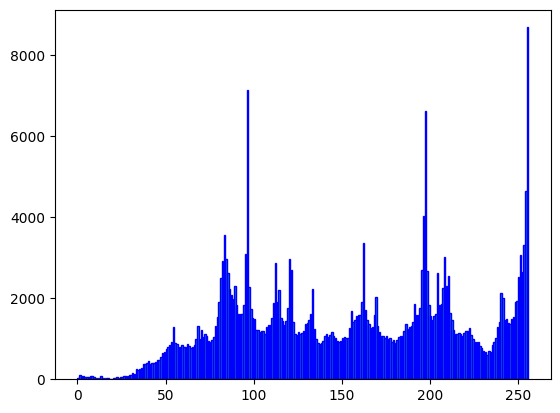

In [ ]:
#plotting the manually calculated histogram
arr = np.arange(256)
plt.bar(arr, histogram, align='edge', edgecolor='blue')

**Calculate CDF from the histogram:**

In [ ]:
#function to manually calculate cdf
def cumsum(h):
  cdf = np.zeros(len(h))
  cdf[0] = h[0]
  for i in range(1, len(h)):
    cdf[i] = cdf[i-1] + h[i]
  return cdf


In [ ]:
#function to normalize the cdf
def normalized_cdf(cdf):
  num = cdf - np.min(cdf)
  den = np.max(cdf) - np.min(cdf)
  return (num/den)*255

In [ ]:
cdf = cumsum(histogram)
cdf_norm = normalized_cdf(cdf)

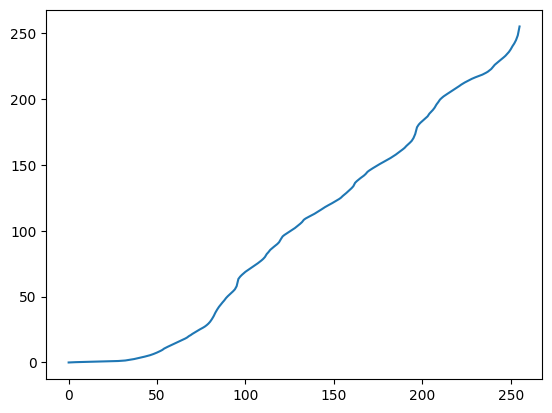

In [ ]:
#plotting the normalized cdf values
plt.plot(cdf_norm)

**Apply Histogram Equalization**

In [ ]:
#setting the new values for intensity after equalization
cdf_norm = cdf_norm.astype(np.uint8)
img_new = cdf_norm[flat]
img_new = np.reshape(img_new, gray.shape)

In [ ]:
#histogram for new image
histogram_new = histogram_manual(img_new.flatten(), 256)

<BarContainer object of 256 artists>

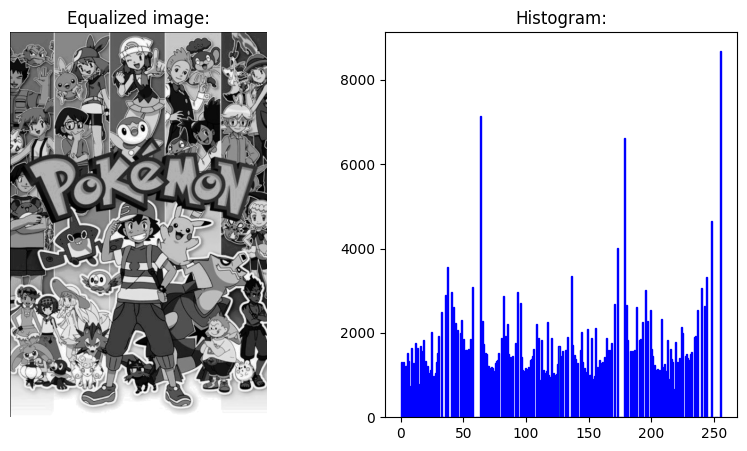

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Equalized image:")
plt.axis('off')
plt.imshow(img_new, cmap='gray')
plt.subplot(1,2,2)
plt.title("Histogram:")
plt.bar(arr, histogram_new, align='edge', edgecolor='blue')

**Compare Results:**

(-0.5, 467.5, 702.5, -0.5)

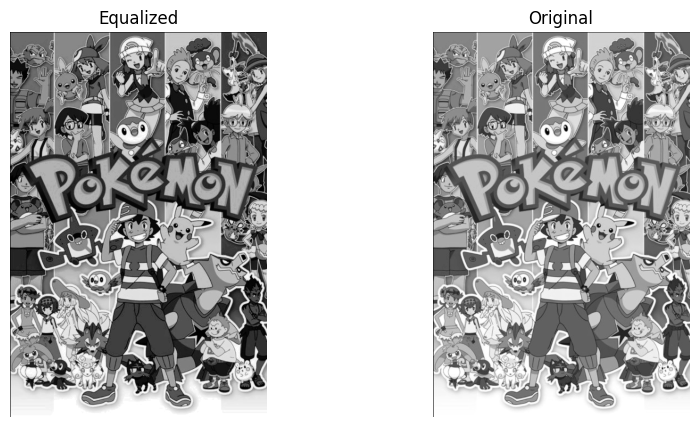

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Equalized")
plt.imshow(img_new, cmap="gray")
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Original")
plt.imshow(gray, cmap="gray")
plt.axis('off')

After performing Histogram Equalization on the image, we can see that the new image has improved contrast and better visibility. The distribution of the histogram is more uniform as well. However, there appears to be some loss of detail in the image and it has a washed out look (the highlights and shadows are more clearly distinguishable in the original image than in the equalized image).

# Task 2: Comparing Histogram Equalization Techniques:

**Standard Histogram Equalization**

In [ ]:
#standard Histogram Equalization
equalized_image = cv2.equalizeHist(gray)

**Implement Adaptive Histogram Equalization**

In [ ]:
# Adaptive Histogram Equalization
def adaptive_histogram_equalization(image, tile_size=8):
    h, w = image.shape
    ahe_image = np.zeros_like(image)
    #looping over the image in tiles
    for i in range(0, h, tile_size):
        for j in range(0, w, tile_size):
            tile = image[i:i + tile_size, j:j + tile_size]
            ahe_tile = cv2.equalizeHist(tile)
            ahe_image[i:i + tile_size, j:j + tile_size] = ahe_tile
    return ahe_image

ahe_image = adaptive_histogram_equalization(gray)

**Implement Contrast Limited Adaptive Histogram Equalization (CLAHE)**

In [ ]:
# Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray)

**Compare Results**

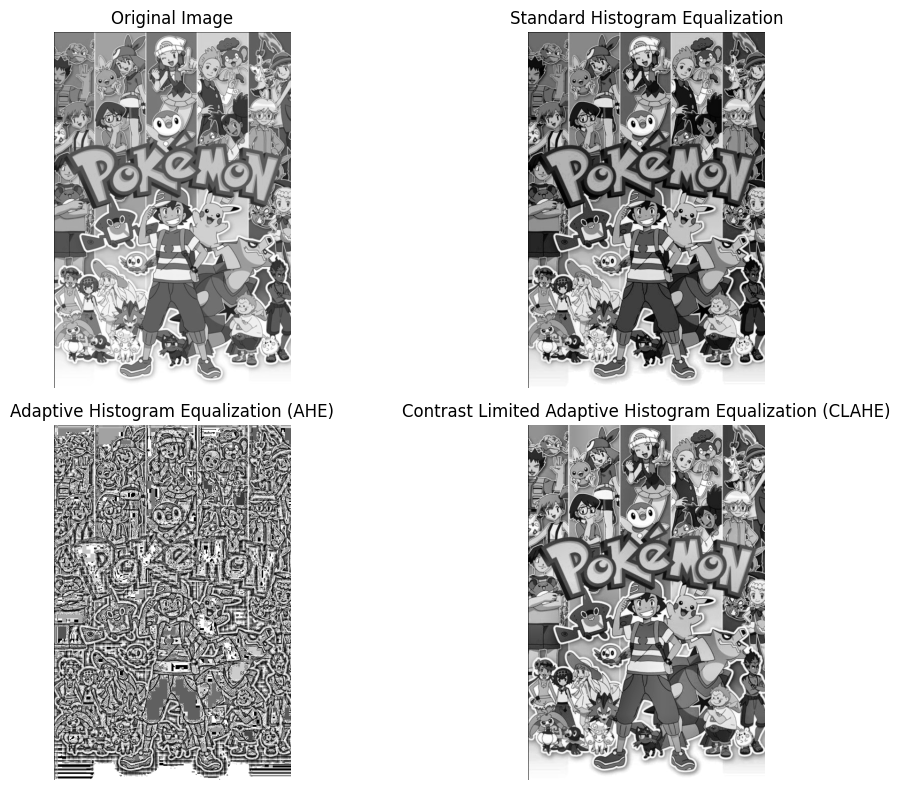

In [ ]:
# Display the images side by side
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Standard Histogram Equalization')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Adaptive Histogram Equalization (AHE)')
plt.imshow(ahe_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Contrast Limited Adaptive Histogram Equalization (CLAHE)')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Task 3: Implementing Histogram Equalization on Color Images

**Separate Color Channels**

In [ ]:
#splitting the image into different color channels
b,g,r = cv2.split(img)

**Apply Histogram Equalization to Each Channel**

In [ ]:
#performing histogram equalization to each channel
b_hist = histogram_manual(b.flatten(), 256)
cdf_b = cumsum(b_hist)
cdf_norm_b = normalized_cdf(cdf_b)
cdf_norm_b = cdf_norm_b.astype(np.uint8)
b_new = cdf_norm_b[b.flatten()]
b_new = np.reshape(b_new, b.shape)

g_hist = histogram_manual(g.flatten(), 256)
cdf_g = cumsum(g_hist)
cdf_norm_g = normalized_cdf(cdf_g)
cdf_norm_g = cdf_norm_g.astype(np.uint8)
g_new = cdf_norm_g[g.flatten()]
g_new = np.reshape(g_new, g.shape)

r_hist = histogram_manual(r.flatten(), 256)
cdf_r = cumsum(r_hist)
cdf_norm_r = normalized_cdf(cdf_r)
cdf_norm_r = cdf_norm_r.astype(np.uint8)
r_new = cdf_norm_r[r.flatten()]
r_new = np.reshape(r_new, r.shape)

**Reconstruct the Color Image**

In [ ]:
#Combining the equalized color channels to form the final image
new_img = cv2.merge((b_new, g_new, r_new))

**Compare Results**

(-0.5, 467.5, 702.5, -0.5)

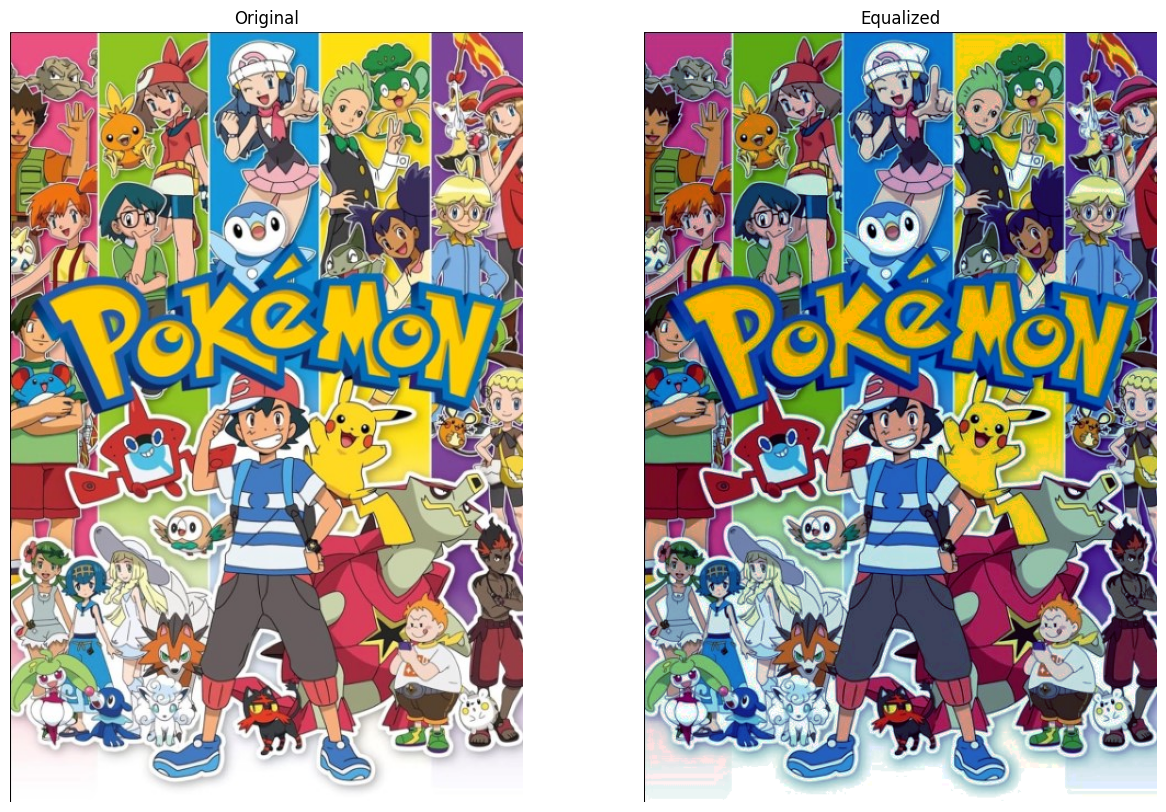

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Equalized")
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Task 4: Histogram Equalization in Different Applications

**Medical Imaging**

In [ ]:
#reading image
x = cv2.imread('x-ray.jpg')
xray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

In [ ]:
#applying histogram equalization
xray_hist = histogram_manual(xray.flatten(), 256)
xray_cdf = cumsum(xray_hist)
xray_cdf_norm = normalized_cdf(xray_cdf)
xray_cdf_norm = xray_cdf_norm.astype(np.uint8)
xray_new = xray_cdf_norm[xray.flatten()]
xray_new = np.reshape(xray_new, xray.shape)

(-0.5, 554.5, 342.5, -0.5)

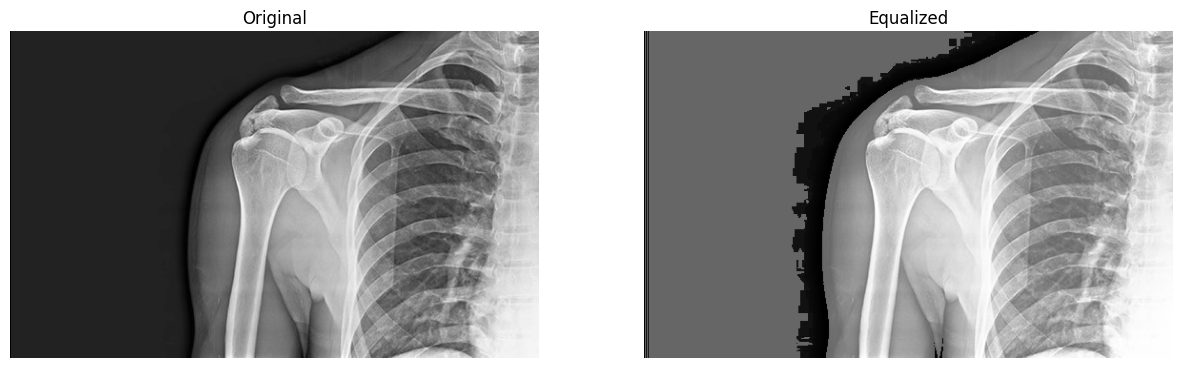

In [ ]:
#comparing original and equalized images
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(xray, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Equalized")
plt.imshow(xray_new, cmap='gray')
plt.axis('off')

**Satellite Imaging**

In [ ]:
s_img = cv2.imread('satellite-image.jpg')
s_img = cv2.cvtColor(s_img, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(s_img)
b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)
img_new = cv2.merge((b, g, r))

(-0.5, 63.5, 63.5, -0.5)

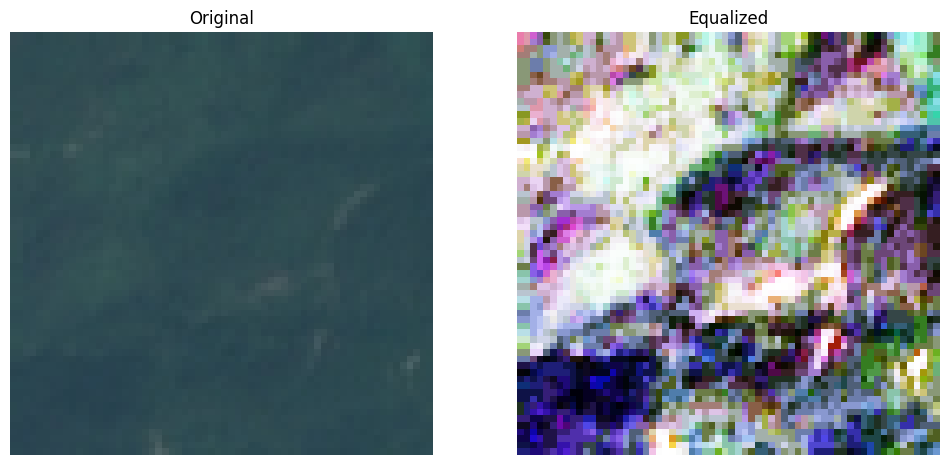

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(s_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Equalized")
plt.imshow(img_new)
plt.axis('off')

**Document Scanning**

In [ ]:
#reading image
d = cv2.imread('doc.png')
doc = cv2.cvtColor(d, cv2.COLOR_BGR2GRAY)

In [ ]:
#applying histogram equalization
doc_hist = histogram_manual(doc.flatten(), 256)
doc_cdf = cumsum(doc_hist)
doc_cdf_norm = normalized_cdf(doc_cdf)
doc_cdf_norm = doc_cdf_norm.astype(np.uint8)
doc_new = doc_cdf_norm[doc.flatten()]
doc_new = np.reshape(doc_new, doc.shape)

(-0.5, 699.5, 705.5, -0.5)

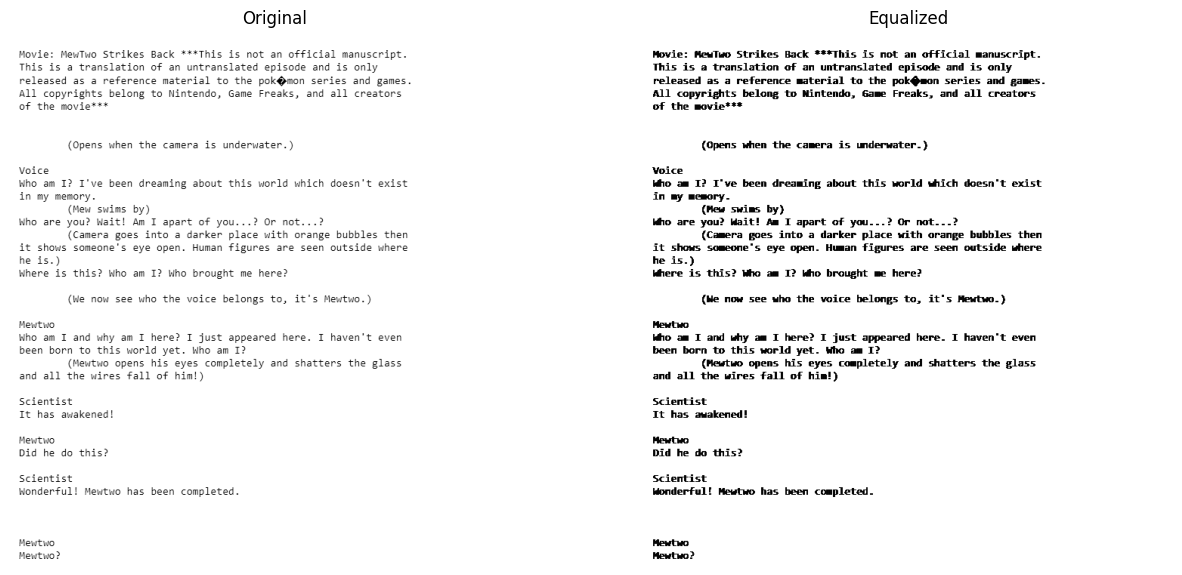

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(doc, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Equalized")
plt.imshow(doc_new, cmap='gray')
plt.axis('off')

**Night Vision**

In [ ]:
#reading image
night = cv2.imread('night.png')

In [ ]:
#applying histogram equalization
night_hist = histogram_manual(night.flatten(), 256)
night_cdf = cumsum(night_hist)
night_cdf_norm = normalized_cdf(night_cdf)
night_cdf_norm = night_cdf_norm.astype(np.uint8)
night_new = night_cdf_norm[night.flatten()]
night_new = np.reshape(night_new, night.shape)

(-0.5, 657.5, 401.5, -0.5)

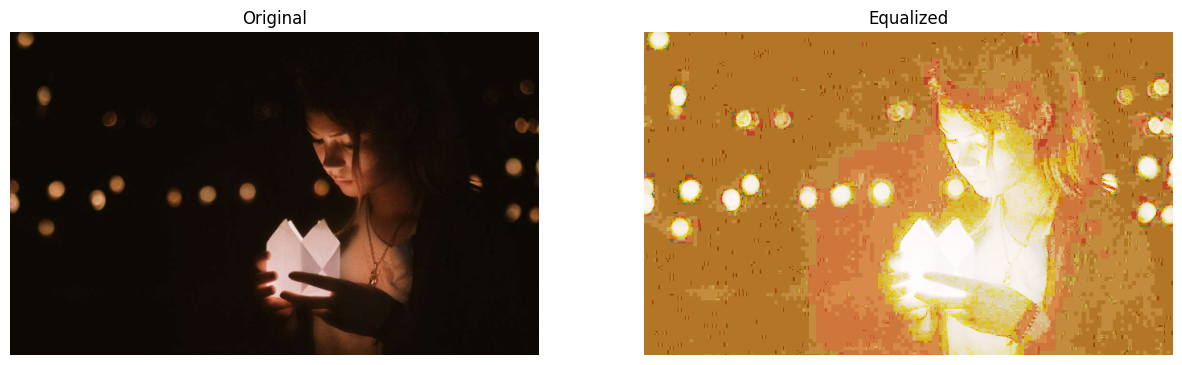

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(night, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Equalized")
plt.imshow(cv2.cvtColor(night_new, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Task 5: Histogram Equalization for Low Contrast Images

**Selecting Image**

In [ ]:
low_con = cv2.imread('low_con.jpg')

**Applying Histogram Equalization on the Images**

In [ ]:
hist_low = histogram_manual(low_con.flatten(), 256)
cdf_low = cumsum(hist_low)
cdf_norm_low = normalized_cdf(cdf_low)
cdf_norm_low = cdf_norm_low.astype(np.uint8)
low_con_new = cdf_norm_low[low_con.flatten()]
low_con_new = np.reshape(low_con_new, low_con.shape)

**Evaluating Enhancement**

(-0.5, 557.5, 360.5, -0.5)

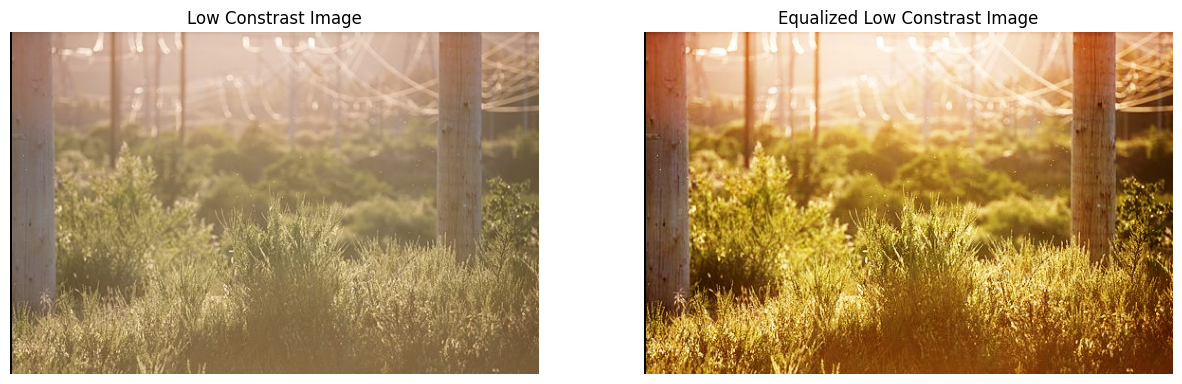

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.title("Low Constrast Image")
plt.imshow(cv2.cvtColor(low_con, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Equalized Low Constrast Image")
plt.imshow(cv2.cvtColor(low_con_new, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Task 6: Multi-Scale Histogram Equalization

**Image Rescaling**

In [ ]:
#defining scales
scales = [0.5, 1.0, 2.0]
scaled_images = []

**Apply Histogram Equalization**

In [ ]:
#applying Histogram Equalization on the images
for scale in scales:
    width = int(gray.shape[1] * scale)
    height = int(gray.shape[0] * scale)
    dim = (width, height)
    resized_image = cv2.resize(gray, dim)
    equalized_image = cv2.equalizeHist(resized_image)
    scaled_images.append((resized_image, equalized_image))

(-0.5, 935.5, 1405.5, -0.5)

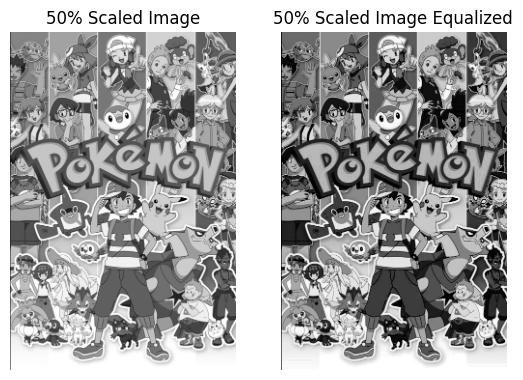

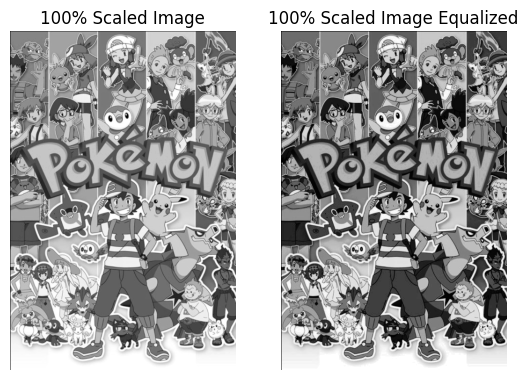

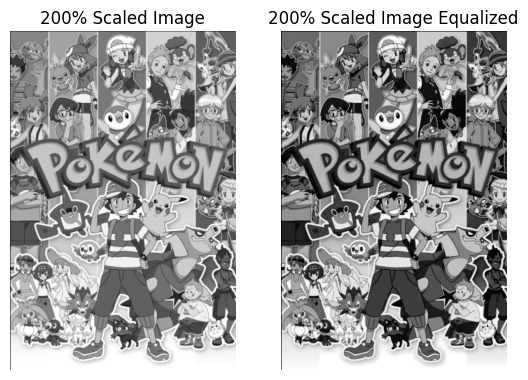

In [ ]:
#displaying results
plt.figure()
plt.subplot(1,2,1)
plt.title("50% Scaled Image")
plt.imshow(scaled_images[0][0], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("50% Scaled Image Equalized")
plt.imshow(scaled_images[0][1], cmap='gray')
plt.axis('off')

plt.figure()
plt.subplot(1,2,1)
plt.title("100% Scaled Image")
plt.imshow(scaled_images[1][0], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("100% Scaled Image Equalized")
plt.imshow(scaled_images[1][1], cmap='gray')
plt.axis('off')

plt.figure()
plt.subplot(1,2,1)
plt.title("200% Scaled Image")
plt.imshow(scaled_images[2][0], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("200% Scaled Image Equalized")
plt.imshow(scaled_images[2][1], cmap='gray')
plt.axis('off')

**Compare Results**

# Task 7: Histogram Equalization for Image Enhancement

**Selecting Images**

In [ ]:
#selecting images with different levels of detail and contrast
low_con = cv2.imread('low_con.jpg')
high_con = cv2.imread('high_con.jpg')
low_det = cv2.imread('low_det.png')
high_det = cv2.imread('high_det.png')

**Applying Histogram Equalization on the Images**

In [ ]:
hist_1 = histogram_manual(low_con.flatten(), 256)
cdf_1 = cumsum(hist_1)
cdf_norm_1 = normalized_cdf(cdf_1)
cdf_norm_1 = cdf_norm_1.astype(np.uint8)
low_con_new = cdf_norm_1[low_con.flatten()]
low_con_new = np.reshape(low_con_new, low_con.shape)

In [ ]:
hist_2 = histogram_manual(high_con.flatten(), 256)
cdf_2 = cumsum(hist_2)
cdf_norm_2 = normalized_cdf(cdf_2)
cdf_norm_2 = cdf_norm_2.astype(np.uint8)
high_con_new = cdf_norm_2[high_con.flatten()]
high_con_new = np.reshape(high_con_new, high_con.shape)

In [ ]:
hist_3 = histogram_manual(low_det.flatten(), 256)
cdf_3 = cumsum(hist_3)
cdf_norm_3 = normalized_cdf(cdf_3)
cdf_norm_3 = cdf_norm_3.astype(np.uint8)
low_det_new = cdf_norm_3[low_det.flatten()]
low_det_new = np.reshape(low_det_new, low_det.shape)

In [ ]:
hist_4 = histogram_manual(high_det.flatten(), 256)
cdf_4 = cumsum(hist_4)
cdf_norm_4 = normalized_cdf(cdf_4)
cdf_norm_4 = cdf_norm_4.astype(np.uint8)
high_det_new = cdf_norm_4[high_det.flatten()]
high_det_new = np.reshape(high_det_new, high_det.shape)

**Evaluating Enhancement**

(-0.5, 590.5, 456.5, -0.5)

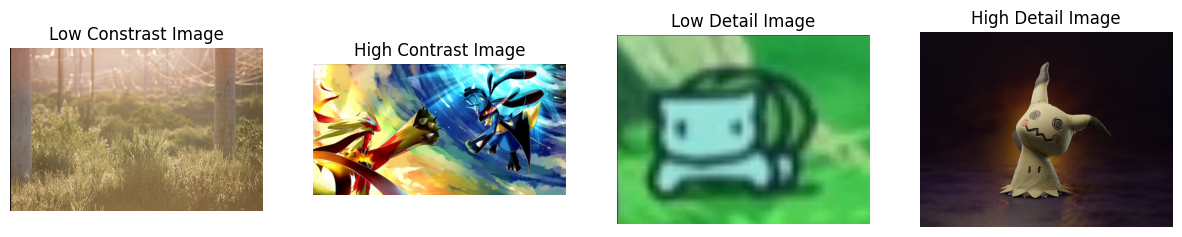

In [ ]:
#Original Images
plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
plt.title("Low Constrast Image")
plt.imshow(cv2.cvtColor(low_con, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,4,2)
plt.title("High Contrast Image")
plt.imshow(cv2.cvtColor(high_con, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,4,3)
plt.title("Low Detail Image")
plt.imshow(cv2.cvtColor(low_det, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,4,4)
plt.title("High Detail Image")
plt.imshow(cv2.cvtColor(high_det, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 590.5, 456.5, -0.5)

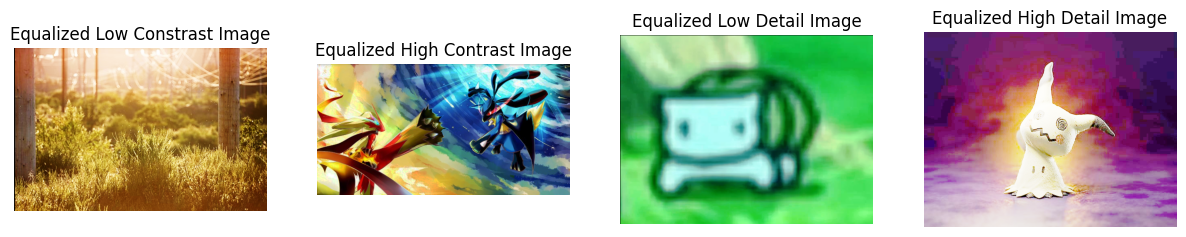

In [ ]:
#Equalized Images
plt.figure(figsize=[15,10])
plt.subplot(1,4,1)
plt.title("Equalized Low Constrast Image")
plt.imshow(cv2.cvtColor(low_con_new, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,4,2)
plt.title("Equalized High Contrast Image")
plt.imshow(cv2.cvtColor(high_con_new, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,4,3)
plt.title("Equalized Low Detail Image")
plt.imshow(cv2.cvtColor(low_det_new, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,4,4)
plt.title("Equalized High Detail Image")
plt.imshow(cv2.cvtColor(high_det_new, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Task 8: Histogram Equalization in Image Segmentation

**Image Segmentation**

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
#performing segmentation on image
lower = np.array([100, 150, 0])
higher = np.array([140, 255, 255])
mask = cv2.inRange(hsv, lower, higher)
res = cv2.bitwise_and(img, img, mask=mask)

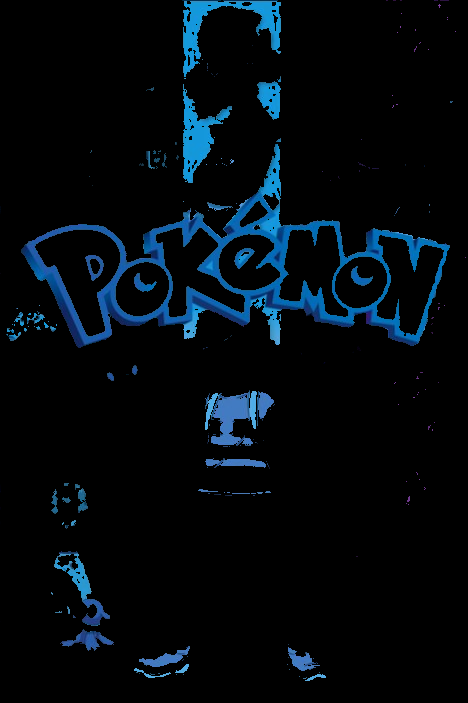

In [ ]:
cv2_imshow(res)

**Apply Histogram Equalization**

In [ ]:
#applying Histogram equalization to original image and performing segmentation
f = np.asarray(img)
print(f.flatten())
h = histogram_manual(f.flatten(), 256)
c = cumsum(h)
norm = normalized_cdf(c)
norm = norm.astype(np.uint8)
new = norm[img.flatten()]
new = np.reshape(new, img.shape)

[ 34  30  42 ... 255 255 255]


In [ ]:
#performing the same segmentation
res_new = cv2.bitwise_and(new, new, mask=mask)

**Compare Segmentation Results**

(-0.5, 467.5, 702.5, -0.5)

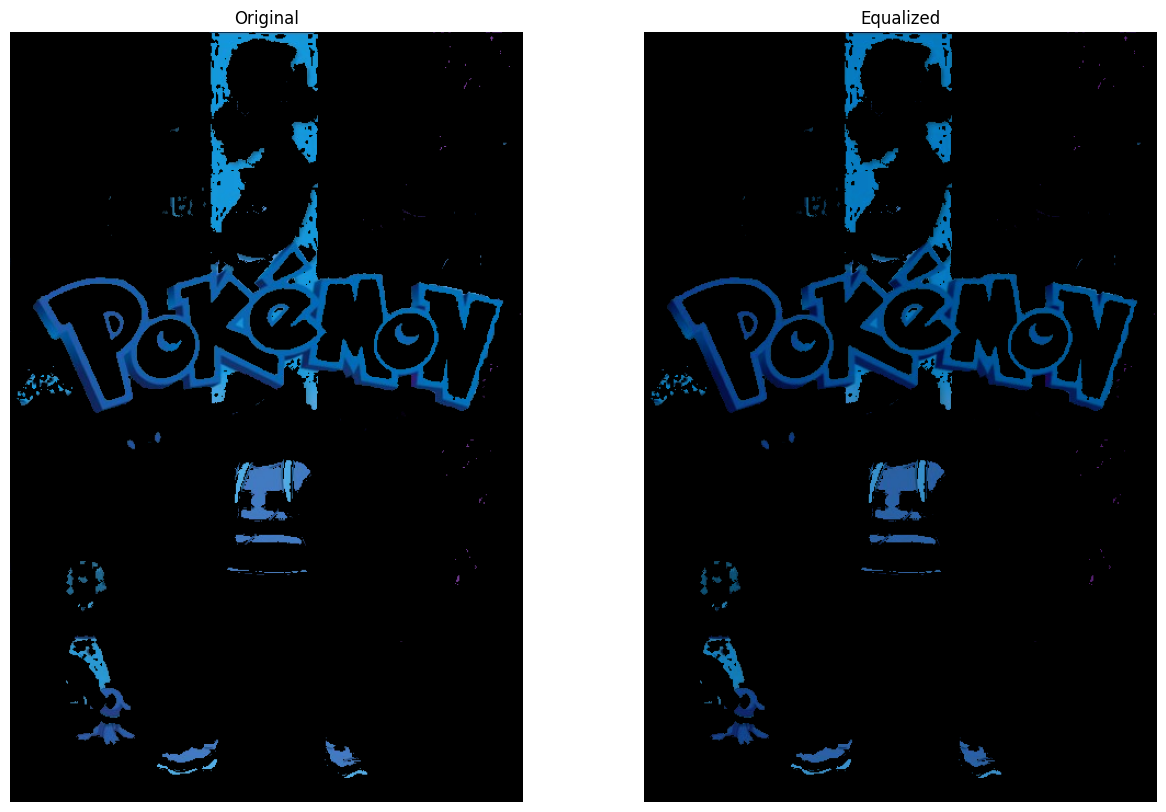

In [ ]:
#difference between segmentation before and after histogram equalization
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Equalized')
plt.imshow(cv2.cvtColor(res_new, cv2.COLOR_BGR2RGB))
plt.axis('off')